<a href="https://colab.research.google.com/github/MohammadKatif/Basic-Image-Classification-Convolutional-Neural-Network-Model/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GOAL: Learning Pytorch CNN for image classification

# importing the libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

In [ ]:
# Dataset and Dataloader

image_to_tensor = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# CIFAR10 has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.
# CIFAR10 documentation: https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10
# A Dataset allows us to retrieve our dataset’s features and labels one sample at a time.

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=image_to_tensor)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=image_to_tensor)

# A Dataloader allows us to iterate through the dataset as needed. Each iteration returns a batch of features and labels from the dataset. The size of the batch and the shuffling in the iteration can be defined using the parameters of the Dataloader.

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

# Each batch will contain 32 items(feaures their labels), because 32 is the batch size.
# Shuffle true means that the order in which the batches are fed to the model changes with every epoch.

Files already downloaded and verified
Files already downloaded and verified


The following image is of a dog


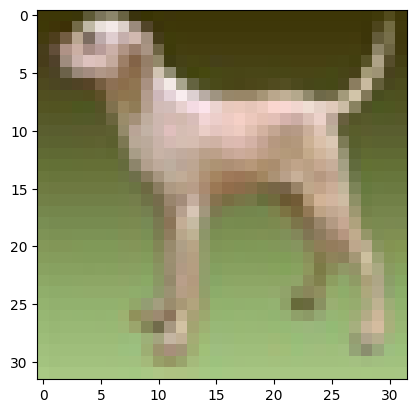

In [ ]:
# Visualizing one sample from the dataset CIFAR10

image_tensor, label = trainset[9999]  # Get the first image in the dataset

# Convert the tensor to a NumPy array for visualization
image_np = image_tensor.numpy()

# Since the image is in the format [Channel, Height, Width], we need to transpose it to [Height, Width, Channel]
image_np = np.transpose(image_np, (1, 2, 0))

plt.imshow(image_np)
print(f'The following image is of a {trainset.classes[label]}')
plt.show()

# plt.imshow(trainset.data[9999])
# plt.show()

In [ ]:
# Understanding how the dataloader works

c = 0
epochs = 1
for epoch in range(epochs):
  for features, labels in trainloader:
    c = c+1
    print(c, ':', labels)
    # print(trainset.classes[label[0]]) # Prints the name of the first label of each batch

# Length of trainset is 50016 and if we divide that into batches of 32, then the dataloader should give 1563 batches of 32 in each epoch.

1 : tensor([9, 5, 0, 2, 4, 7, 9, 0, 7, 4, 9, 9, 1, 5, 9, 7, 0, 8, 1, 2, 3, 7, 8, 7,
        4, 6, 1, 8, 4, 2, 3, 7])
2 : tensor([6, 4, 2, 3, 5, 6, 1, 6, 1, 2, 3, 9, 2, 2, 4, 1, 3, 7, 4, 1, 4, 7, 3, 0,
        3, 5, 5, 6, 2, 5, 9, 4])
3 : tensor([3, 6, 0, 7, 2, 3, 3, 6, 5, 5, 2, 0, 9, 0, 4, 4, 6, 9, 1, 7, 8, 6, 7, 5,
        2, 9, 9, 9, 7, 2, 6, 5])
4 : tensor([3, 4, 8, 6, 0, 4, 3, 2, 1, 7, 0, 3, 1, 7, 2, 9, 4, 6, 8, 4, 7, 1, 3, 2,
        8, 5, 4, 1, 2, 6, 3, 3])
5 : tensor([5, 2, 5, 5, 3, 8, 1, 1, 7, 5, 4, 3, 6, 8, 8, 8, 4, 6, 3, 2, 2, 3, 5, 7,
        7, 3, 5, 9, 9, 7, 8, 0])
6 : tensor([8, 4, 2, 5, 8, 5, 7, 7, 7, 4, 6, 1, 7, 9, 5, 0, 6, 2, 2, 4, 4, 4, 1, 1,
        0, 3, 3, 0, 9, 3, 9, 7])
7 : tensor([4, 9, 0, 8, 1, 5, 8, 2, 5, 1, 2, 8, 4, 3, 4, 8, 1, 9, 2, 5, 3, 1, 8, 1,
        7, 7, 6, 5, 2, 7, 9, 9])
8 : tensor([8, 6, 4, 5, 2, 3, 7, 0, 3, 1, 0, 0, 7, 5, 3, 8, 8, 0, 2, 8, 1, 7, 7, 2,
        7, 6, 0, 7, 9, 9, 6, 5])
9 : tensor([7, 7, 1, 6, 1, 2, 3, 8, 2, 7, 2, 0, 7, 8, 0, 3, 9, 4

In [ ]:
# Defining the model

class CIFAR10Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), stride=1, padding=1) # in_channels=3 because RGB and out_channels=32 because 32 different filter/kernels are needed to produce 32 feature maps
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=(2,2))
    self.flatten = nn.Flatten()
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=(2,2))
    self.fc1 = nn.Linear(32 * 8 * 8, 512) # 32 channels and 8x8 size
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(512, 10) # Output is 10 because total number of labels are 10

  def forward(self, x):
    # input 3x32x32, output 32x32x32
    x = self.relu1(self.conv1(x))
    # input 32x32x32, output 32x16x16
    x = self.pool1(x)
    # input 32x16x16, output 32x16x16
    x = self.relu2(self.conv2(x))
    # input 32x16x16, output 32x8x8
    x = self.pool2(x)
    # input 32x8x8, output 2048
    x = self.flatten(x)
    # input 2048, output 512
    x = self.relu3(self.fc1(x))
    # input 512, output 10
    x = self.fc2(x)
    return x



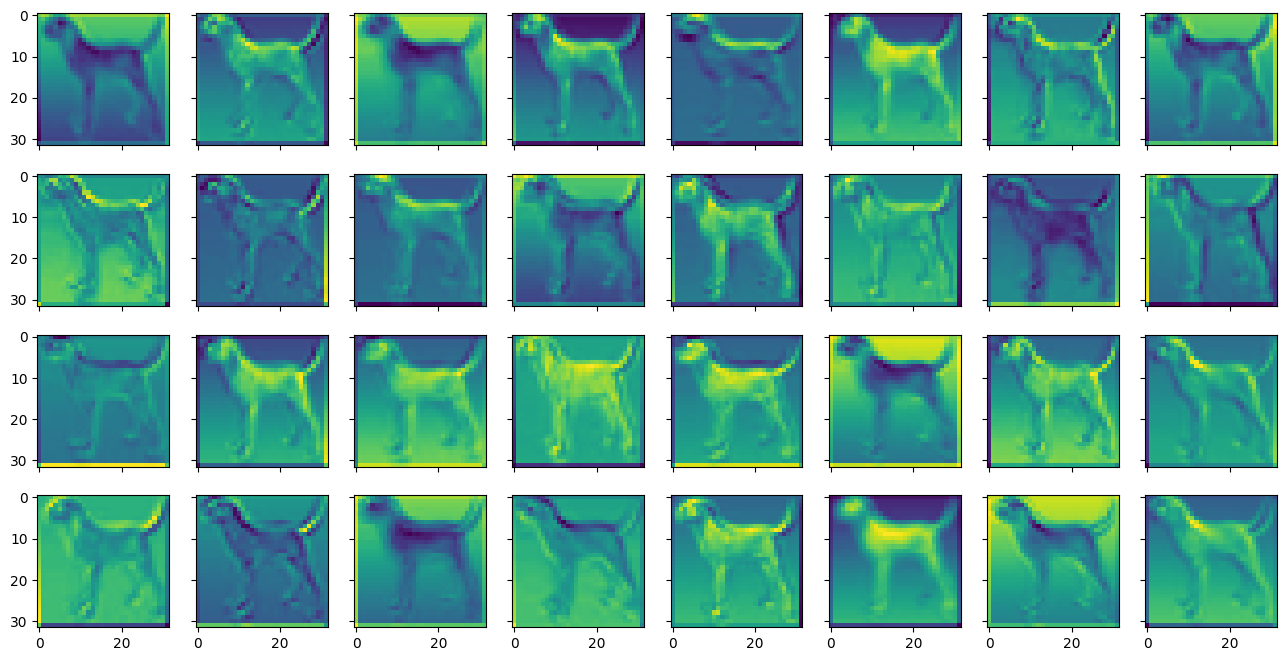

In [ ]:
# Visualizing the feature maps that are outputted by the first convolutional layer of the model

model = CIFAR10Model()
X = torch.tensor([trainset.data[9999]], dtype=torch.float32).permute(0,3,1,2)
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(X)

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()

Input image matrix: tensor([[[[ 62.,  61.,  60.,  ...,  64.,  82.,  62.],
          [ 62.,  63.,  61.,  ...,  77., 114.,  64.],
          [ 67.,  78., 115.,  ..., 100., 119.,  63.],
          ...,
          [161., 159., 159.,  ..., 152., 157., 156.],
          [163., 161., 162.,  ..., 162., 161., 161.],
          [169., 167., 167.,  ..., 167., 167., 167.]],

         [[ 55.,  55.,  55.,  ...,  58.,  75.,  55.],
          [ 56.,  52.,  48.,  ...,  69., 107.,  57.],
          [ 59.,  62.,  93.,  ...,  92., 111.,  56.],
          ...,
          [192., 190., 190.,  ..., 167., 190., 192.],
          [195., 192., 193.,  ..., 191., 193., 193.],
          [201., 198., 198.,  ..., 198., 198., 198.]],

         [[  7.,   7.,   6.,  ...,  10.,  28.,   9.],
          [  7.,   8.,   6.,  ...,  28.,  65.,  12.],
          [ 15.,  28.,  66.,  ...,  58.,  74.,  12.],
          ...,
          [125., 123., 123.,  ..., 123., 128., 123.],
          [127., 125., 126.,  ..., 128., 127., 126.],
          [13

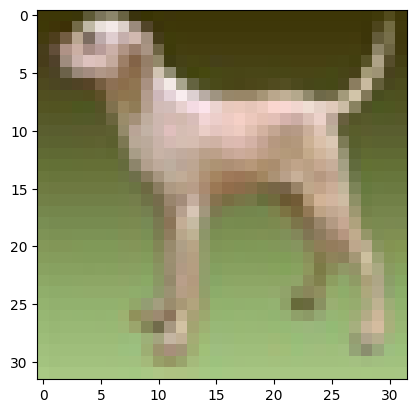


Convolved feature matrix: tensor([[ -34.5609,  -23.1612,  -27.6547,  ...,  -36.3112,  -34.2507,
            1.2393],
        [ -54.4525,  -46.3073,  -67.0315,  ...,  -68.6124,  -61.6631,
          -12.3452],
        [ -59.1792,  -63.6746,  -94.2236,  ...,  -83.2946,  -64.1852,
          -12.0231],
        ...,
        [-168.7426, -133.4644, -134.3182,  ..., -133.0094, -129.7498,
          -69.9171],
        [-172.3479, -135.9649, -136.7978,  ..., -128.8616, -133.3105,
          -72.6331],
        [-128.2399, -109.3029, -109.7766,  ..., -109.0386, -109.2827,
          -67.7172]]) 

Convolved feature map: AxesImage(size=(32, 32))


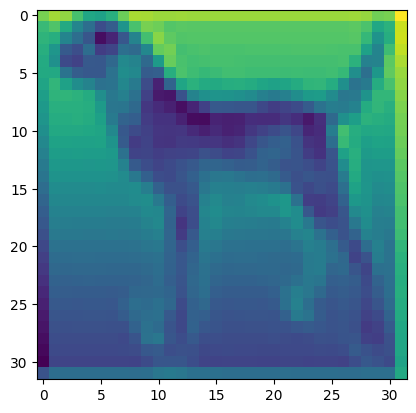

In [ ]:
# Visualizing one of the convolved feature matrix and its map outputted by the first convolutional layer of the model
print(f'Input image matrix: {torch.tensor([trainset.data[9999]], dtype=torch.float32).permute(0,3,1,2)}\n')
print(f'Input image: ')
plt.imshow(trainset.data[9999])
plt.show()
print(f'\nConvolved feature matrix: {feature_maps[0][0]} \n')
print(f'Convolved feature map: {plt.imshow(feature_maps[0][0])}')
# len(feature_maps[0][0][0])
## NOT SURE : Here we can see that the size of the feature map is 30x30 and the size of the actual image was 32x32, which proves that the size reduces after performing the convolution operation on the image

In [ ]:
# Understanding the 3 channels of the input image, which are the RGB versions of that image

dogg= trainset.data[9999]
red_dogg = dogg[:,:,0]
green_dogg = dogg[:,:,1]
blue_dogg = dogg[:,:,2]

print(dogg.shape)
# plt.imshow(dogg)
# plt.imshow(red_dogg)
# plt.imshow(green_dogg)
# plt.imshow(blue_dogg)

(32, 32, 3)


In [ ]:
# Training the model

model =  CIFAR10Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs = 2
for epoch in range(epochs):
  for features, labels in trainloader:
    y_pred = model(features)
    loss = loss_fn(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('Finished training')

Finished training


In [ ]:
# Understanding the output of the model:
# For each image in a batch, the model outputs a list of all the classes(index values) in which the output can belong to and distributes the estimated probablity(element value) to each class

c =0
# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test data
    for images, labels in testloader:
        # Get the model's predictions
        outputs = model(images)
        c += 1
        print(c, outputs)

Streaming output truncated to the last 5000 lines.
        [ 0.8663, -2.0371,  1.1044, -0.1435,  1.2883,  0.1801, -0.6129,  2.3370,
         -0.7025, -0.5144],
        [-0.4909, -1.8343,  2.3104,  0.4254,  2.5535,  0.3105,  2.3490,  0.5053,
         -2.7508, -2.1676],
        [ 1.1346,  1.2702,  0.1077, -0.4393, -0.9272, -0.4501, -1.9361,  1.0764,
          0.5003,  1.4319],
        [-0.4807,  0.7908,  0.7237,  0.5884,  0.4042,  0.3696,  1.6196,  0.2249,
         -2.2477, -0.2786],
        [ 0.7515,  3.0836, -1.1729, -0.4873, -1.5690, -1.3172, -1.7125,  0.2003,
          0.2549,  3.3883],
        [ 0.0657,  0.7847, -0.1666,  1.3174, -1.2620,  1.0552, -0.6569,  1.2052,
         -1.3534,  0.6041],
        [-1.0024, -1.9974,  2.2452,  1.0548,  1.8453,  0.9973,  2.3988, -0.2221,
         -2.0094, -2.1128],
        [ 5.8687,  1.3185,  3.1408, -1.5246,  0.5357, -2.4627, -4.2629, -2.3428,
          2.7085, -0.8442],
        [-0.3071, -0.3268,  0.9649,  0.3107,  0.5754,  0.1355,  1.0646, -0.39

In [ ]:
# Testing the model

correct_predictions = 0
total_samples = 0
with torch.no_grad():
  for features, labels in testloader:
    preds = model(features)
    predicted_labels = preds.argmax(dim=1) # Stores the index of the label that has highest probablity for each image
    total_samples += len(labels)
    for i in range(len(labels)):
      if predicted_labels[i] == labels[i]:
        correct_predictions += 1

accuracy = (correct_predictions/ total_samples) * 100
print(f'Test accuracy: {accuracy}')

Test accuracy: 43.24


In [ ]:
# Integrating testing code into the training code


model =  CIFAR10Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs = 10
for epoch in range(epochs):
  # Training
  for features, labels in trainloader:
    y_pred = model(features)
    loss = loss_fn(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # Testing
  correct_predictions = 0
  total_samples = 0
  with torch.no_grad():
    for features, labels in testloader:
      preds = model(features)
      predicted_labels = preds.argmax(dim=1) # Stores the index of the label that has highest probablity for each image
      total_samples += len(labels)
      for i in range(len(labels)):
        if predicted_labels[i] == labels[i]:
          correct_predictions += 1
  # Results
  accuracy = (correct_predictions/ total_samples) * 100
  print(f'Test accuracy in the {epoch} epoch : {accuracy}')

print('Finished training')

Test accuracy in the 0 epoch : 33.81
Test accuracy in the 1 epoch : 45.01
Test accuracy in the 2 epoch : 50.019999999999996
Test accuracy in the 3 epoch : 52.690000000000005
Test accuracy in the 4 epoch : 54.010000000000005
Test accuracy in the 5 epoch : 57.60999999999999
Test accuracy in the 6 epoch : 59.9
Test accuracy in the 7 epoch : 61.29
Test accuracy in the 8 epoch : 63.77
Test accuracy in the 9 epoch : 63.85999999999999
Finished training


Raw output of the model: tensor([[-2.7405, -4.6123,  3.7272,  2.3208,  4.4749,  4.5653, -0.8009,  6.5843,
         -6.7900, -6.0645]], grad_fn=<AddmmBackward0>)

Decimal probablities: [6.7242341e-05 1.0345072e-05 4.3303315e-02 1.0610400e-02 9.1459431e-02
 1.0011916e-01 4.6771186e-04 7.5395882e-01 1.1720305e-06 2.4211915e-06]

Percentage probablities: [0.01, 0.0, 4.33, 1.06, 9.15, 10.01, 0.05, 75.4, 0.0, 0.0]

Label with the highest probablity: horse

Label with the highest probablity: horse



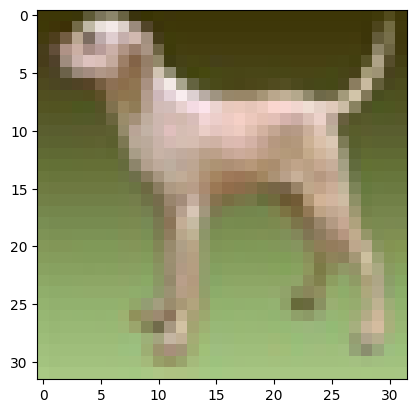

In [ ]:
# Understanding how the model is actually used after it is successfully trained and tested

image_number = 9999
image = trainset.data[image_number]
image = image_to_tensor(image)  # Apply transformations
image = image.unsqueeze(0) # Add batch dimension to match model input

model.eval()
output = model(image) # The output is a tensor list of labels in which estimated probablity is distributed to each label
label_index1 = output.argmax(dim=1)
label1 = trainset.classes[label_index1]
decimal_probablities = F.softmax(output, dim=1)
decimal_probablities = decimal_probablities.detach().numpy()[0]
percentage_probablities = []
for num in decimal_probablities:
  percentage_probablities.append(round(num*100, 2))

for i in range(len(percentage_probablities)):
  if percentage_probablities[i] == np.max(percentage_probablities):
    label_index2 = i
    label2 = trainset.classes[i]

label_img = trainset.data[image_number]
plt.imshow(label_img)

print(f'Raw output of the model: {output}\n')
print(f'Decimal probablities: {decimal_probablities}\n')
print(f'Percentage probablities: {percentage_probablities}\n')
print(f'Label with the highest probablity: {label1}\n')
print(f'Label with the highest probablity: {label2}\n')
plt.show()